In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
gdpFullDf = pd.read_csv('CleanedData/gdp_per_hour_worked_filtered.csv', index_col=0)
# Creating columnn for gdp over labor force to match the column in the original article
gdpFullDf['gdp_over_labor_force'] = gdpFullDf['gdp'] / gdpFullDf['labor_force']
gdpFullDf.reset_index(drop=True, inplace=True)

freedomFullDf = pd.read_csv('CleanedData/HumanFreedomIndex_2007-2021_Cleaned.csv', index_col=0)
freedomFullDf.reset_index(inplace=True, drop=True)

In [3]:
gdpSelectCols = gdpFullDf[['year', 'iso3c', 'country', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c']]
freedomSelectCols = freedomFullDf.drop(columns={'Region', 'HUMAN FREEDOM RANK'})

In [4]:
gdpSelectCols.head()

,year,iso3c,country,gdp_over_labor_force,gdp_ppp_over_labor_force,gdp_ppp_over_k_hours_worked_c
0,2007,AUS,Australia,78120.920741,69751.995589,47828.591243
1,2007,AUT,Austria,92635.396580,77866.496956,67645.310343
2,2007,BEL,Belgium,99585.047912,82680.171532,73741.553706
3,2007,CAN,Canada,79902.764984,70805.734407,50845.133236
4,2007,CHE,Switzerland,113936.708168,89276.283797,69663.070107


In [5]:
freedomSelectCols.head()

,Year,Country Code,Country,HUMAN FREEDOM
0,2021,AUS,Australia,8.52
1,2021,AUT,Austria,8.24
2,2021,BEL,Belgium,8.33
3,2021,CAN,Canada,8.55
4,2021,HRV,Croatia,7.96


In [6]:
gdpSelectCols.rename(columns={'year':'Year', 'country':'Country', 'gdp_over_labor_force':'GDP per Worker', 'gdp_ppp_over_labor_force':'GDP PPP per Worker', 'gdp_ppp_over_k_hours_worked_c':'PPP per Hour Worked'}, inplace=True)
freedomSelectCols.rename(columns={'Country Code':'iso3c', 'HUMAN FREEDOM':'Human Freedom'}, inplace=True)

/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_58478/1932072987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdpSelectCols.rename(columns={'year':'Year', 'country':'Country', 'gdp_over_labor_force':'GDP per Worker', 'gdp_ppp_over_labor_force':'GDP PPP per Worker', 'gdp_ppp_over_k_hours_worked_c':'PPP per Hour Worked'}, inplace=True)


In [7]:
FreedomAndGdp = pd.merge(freedomSelectCols, gdpSelectCols, on=['Year', 'iso3c'])

In [8]:
FreedomAndGdp.drop(columns={'Country_y'}, inplace=True)
FreedomAndGdp.rename(columns={'Country_x':'Country'}, inplace=True)
FreedomAndGdp.head()

,Year,iso3c,Country,Human Freedom,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked
0,2021,AUS,Australia,8.52,112452.456695,104085.288533,56752.377739
1,2021,AUT,Austria,8.24,102436.634785,114516.274214,74007.417120
2,2021,BEL,Belgium,8.33,112934.294752,129614.631326,78921.743984
3,2021,CAN,Canada,8.55,95488.652301,96701.074449,57355.270272
4,2021,HRV,Croatia,7.96,39918.934006,78097.622289,39638.655055


In [9]:
FreedomAndGdp[FreedomAndGdp['iso3c'] == 'FIN'][['Year', 'Human Freedom', 'GDP per Worker', 'GDP PPP per Worker', 'PPP per Hour Worked']].corr()

,Year,Human Freedom,GDP per Worker,GDP PPP per Worker,PPP per Hour Worked
Year,1.000000,-0.755529,0.097242,0.971020,0.757183
Human Freedom,-0.755529,1.000000,-0.228905,-0.800601,-0.592609
GDP per Worker,0.097242,-0.228905,1.000000,0.223924,0.154632
GDP PPP per Worker,0.971020,-0.800601,0.223924,1.000000,0.838948
PPP per Hour Worked,0.757183,-0.592609,0.154632,0.838948,1.000000


In [10]:
FreedomAndGdp[FreedomAndGdp['iso3c'] == 'SWE']['Human Freedom'].max()

8.99

In [11]:
FreedomAndGdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 495 non-null    int64  
 1   iso3c                495 non-null    object 
 2   Country              495 non-null    object 
 3   Human Freedom        495 non-null    float64
 4   GDP per Worker       495 non-null    float64
 5   GDP PPP per Worker   495 non-null    float64
 6   PPP per Hour Worked  491 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 27.2+ KB


In [12]:


# for idex, code in enumerate(countryCodes):
#     matrix = FreedomAndGdp[FreedomAndGdp['iso3c'] == code][['year', 'Human Freedom', 'GDP per Worker', 'GDP PPP per Worker']].corr().round(2)
#     mask = np.triu(np.ones_like(matrix, dtype=bool))
#     sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
#     plt.title(str(FreedomAndGdp[(FreedomAndGdp['iso3c'] == code) & (FreedomAndGdp['year'] == 2010)]['country']))
#     plt.show()

In [14]:
countryCodes = [
    'AUS', 'AUT', 'BEL', 'CAN', 'HRV', 
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 
    'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 
    'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 
    'LUX', 'NLD', 'NZL', 'NOR', 'POL', 
    'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 
    'CHE', 'GBR', 'USA']

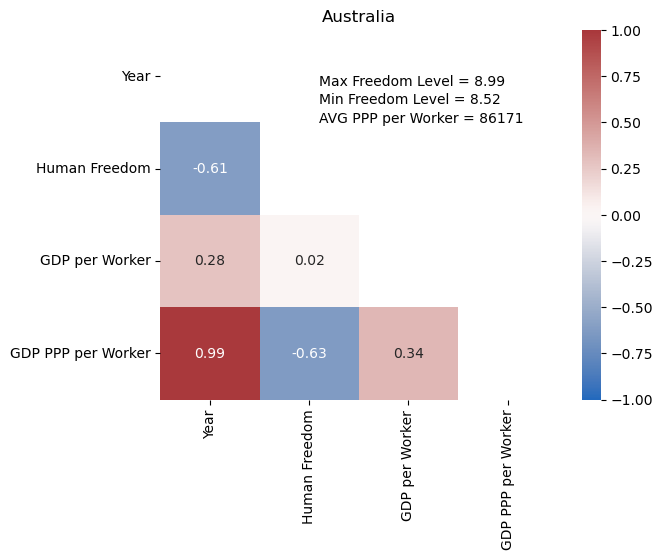

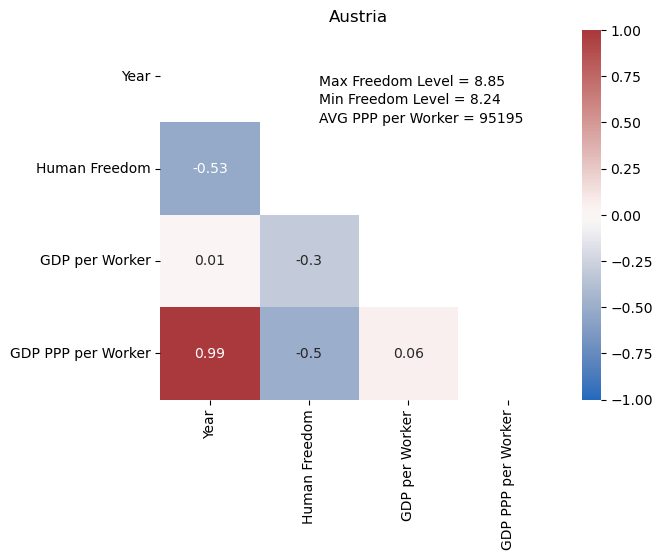

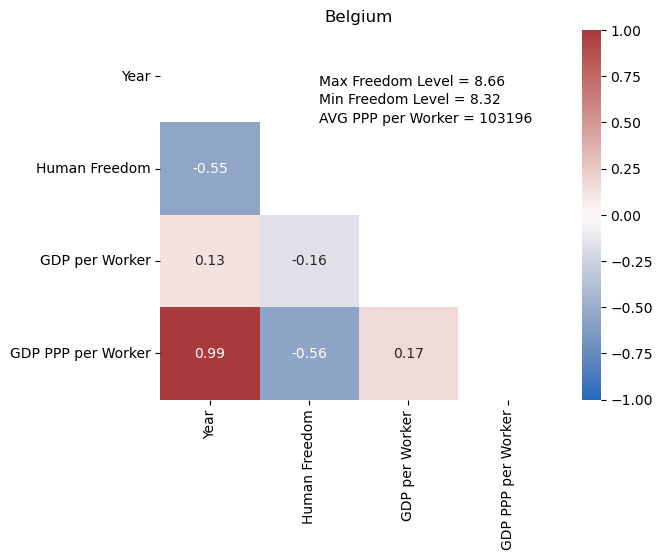

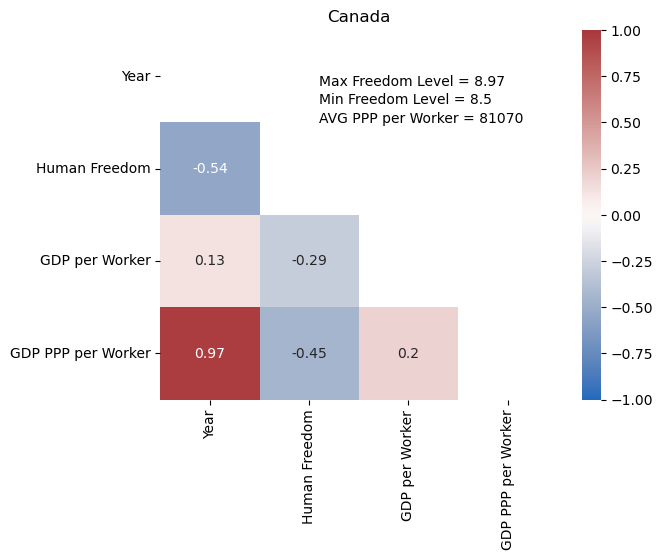

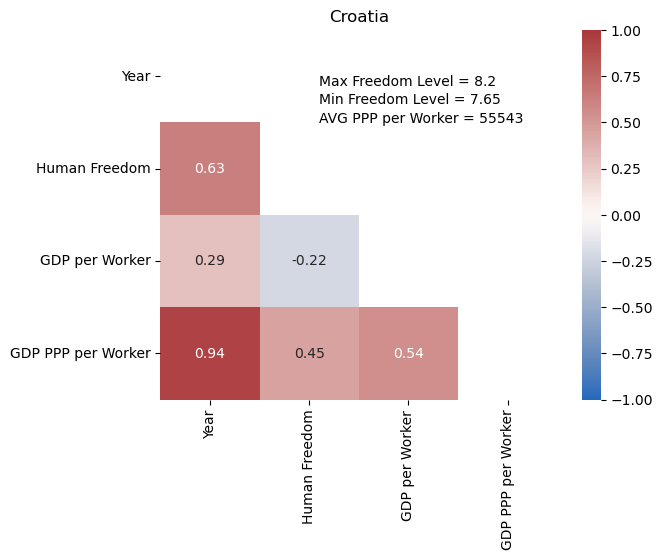

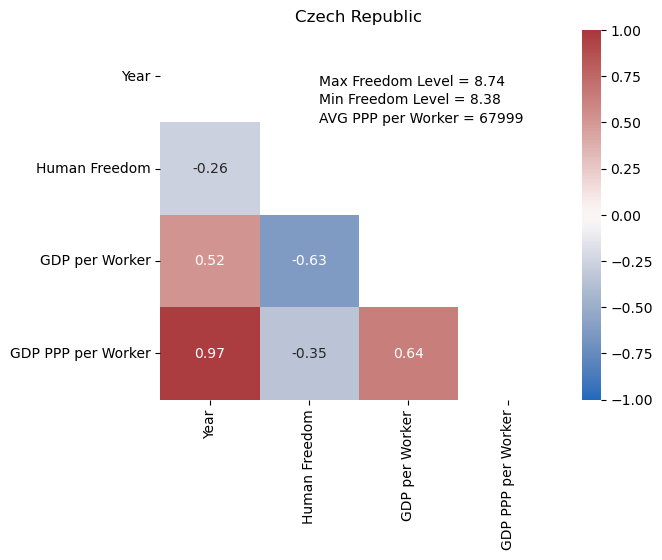

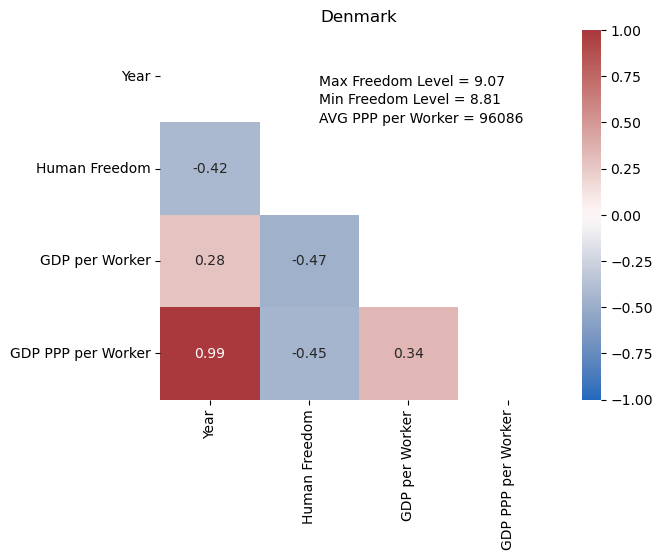

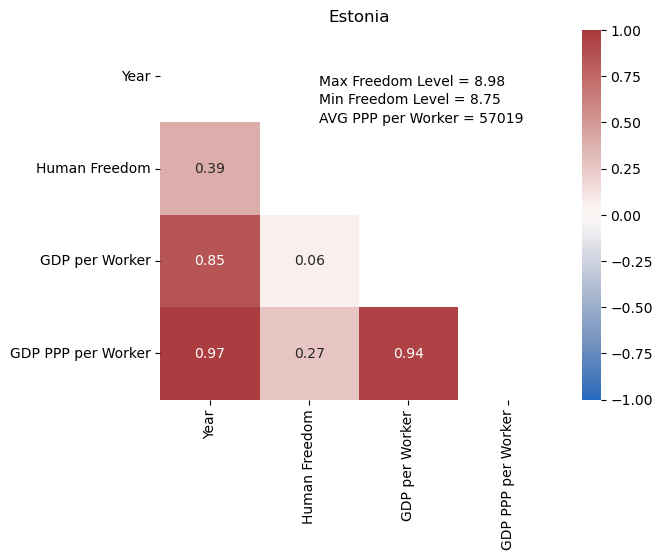

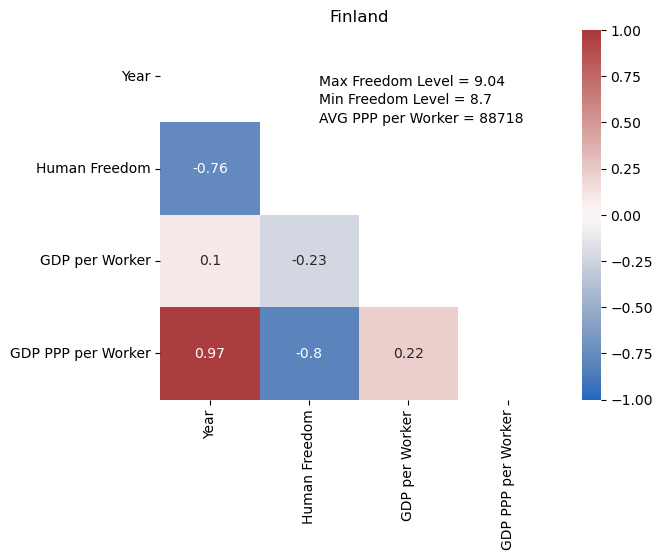

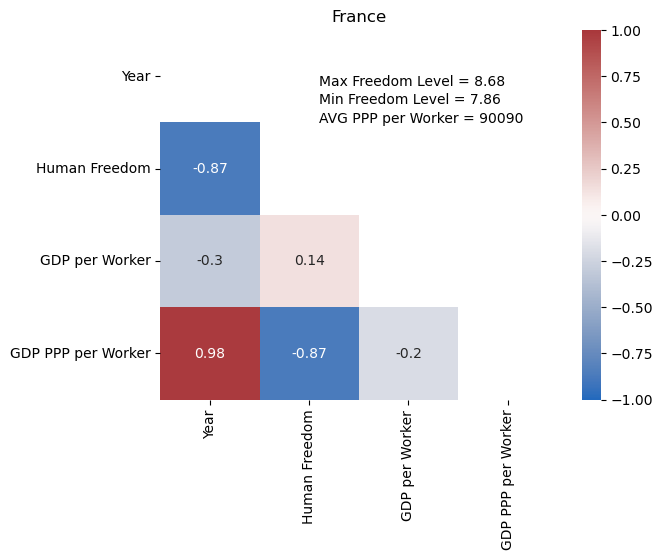

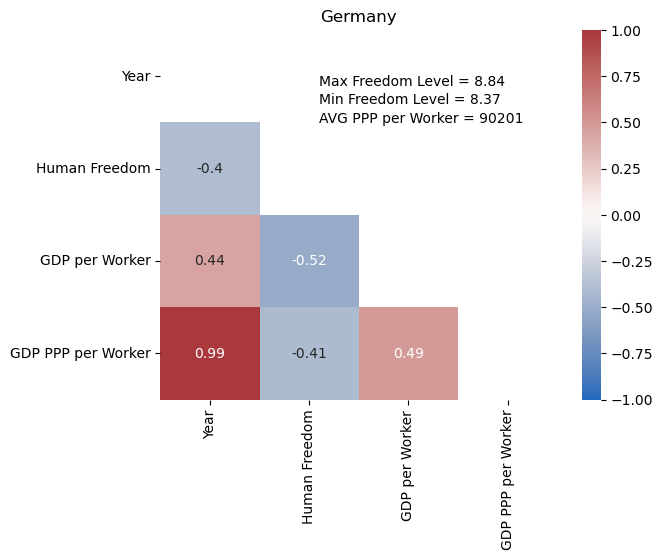

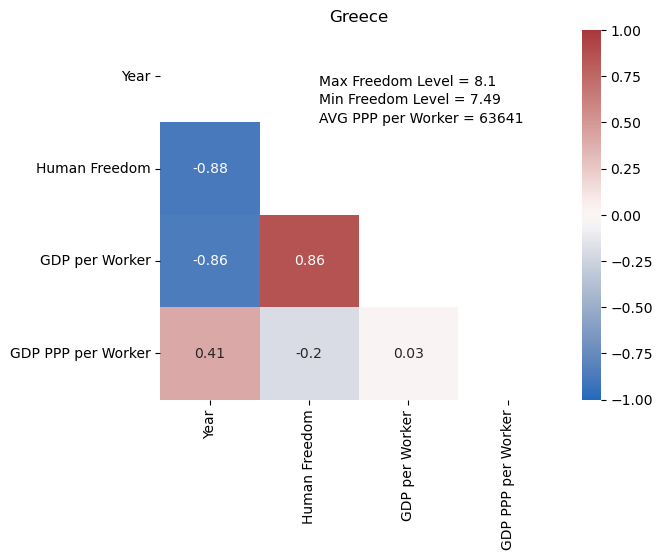

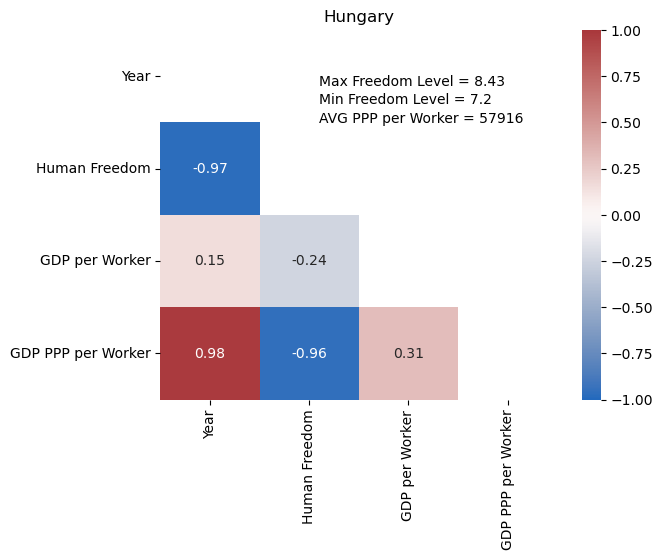

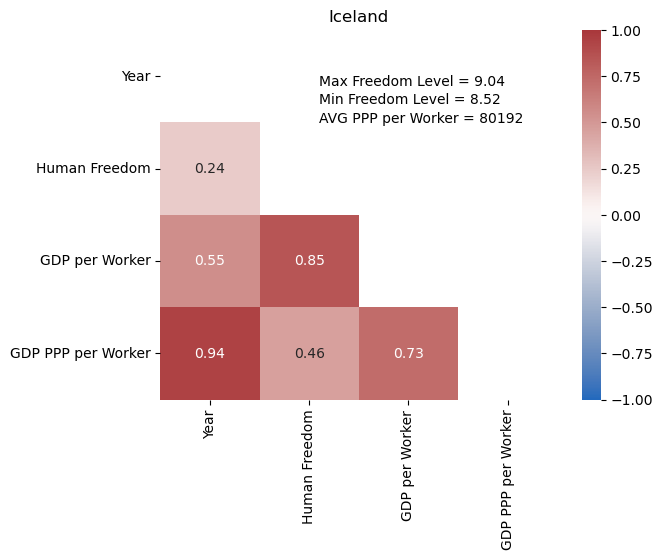

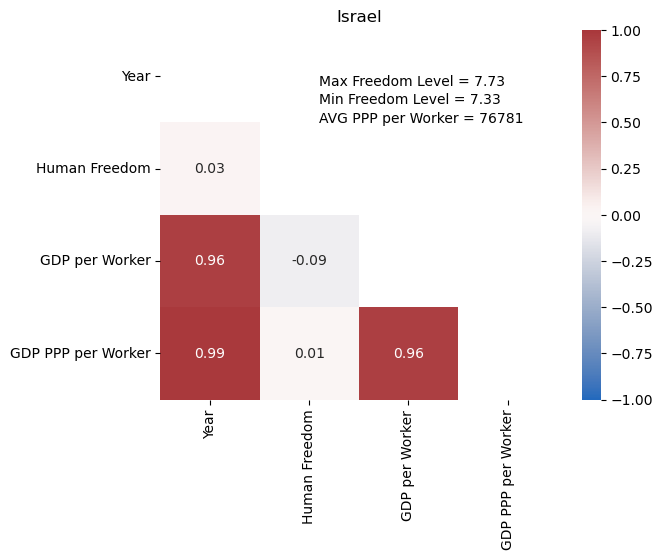

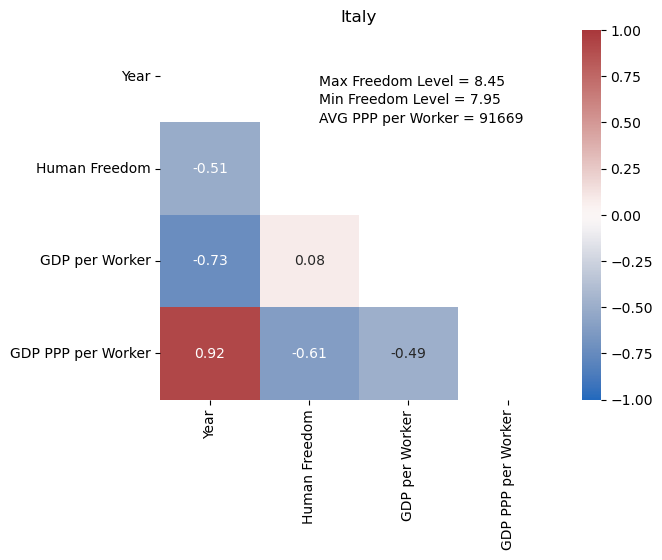

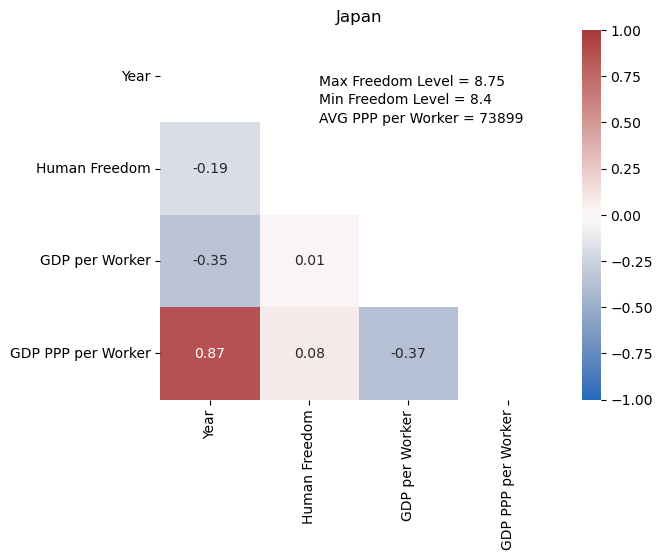

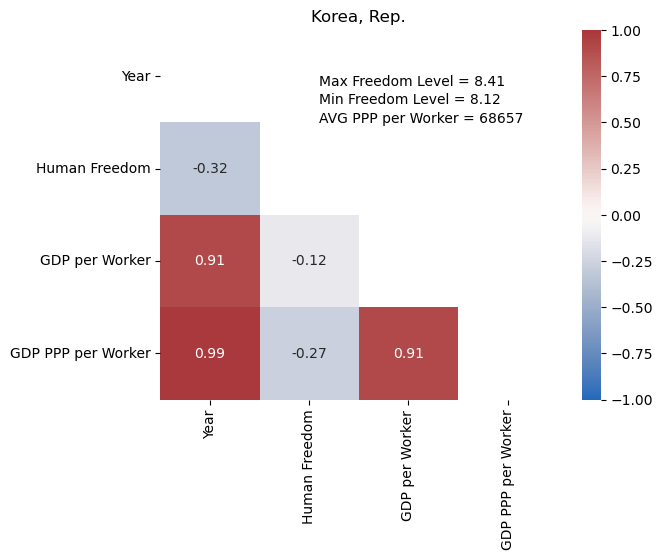

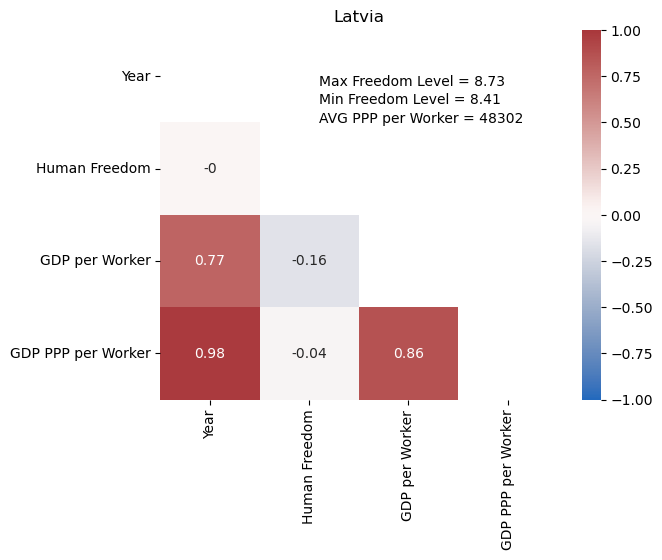

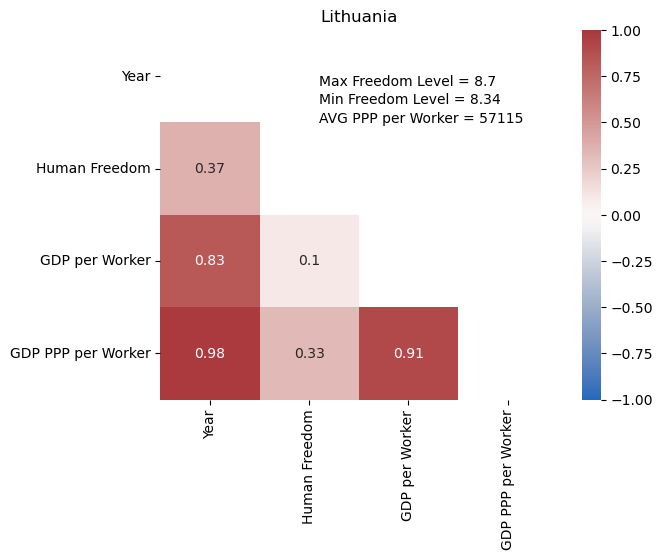

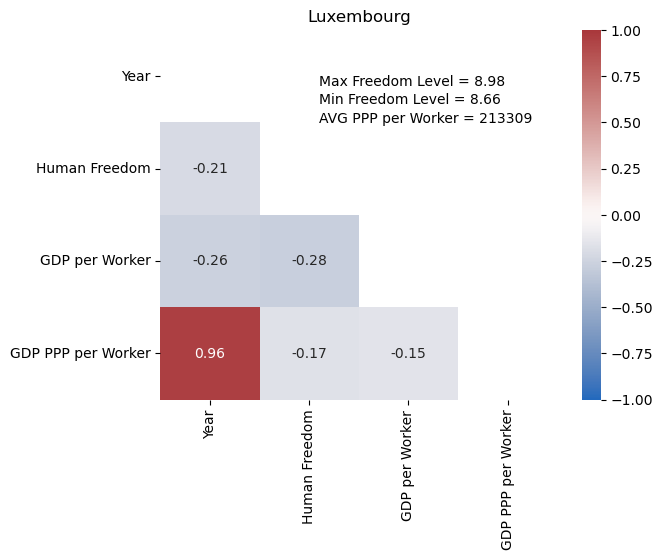

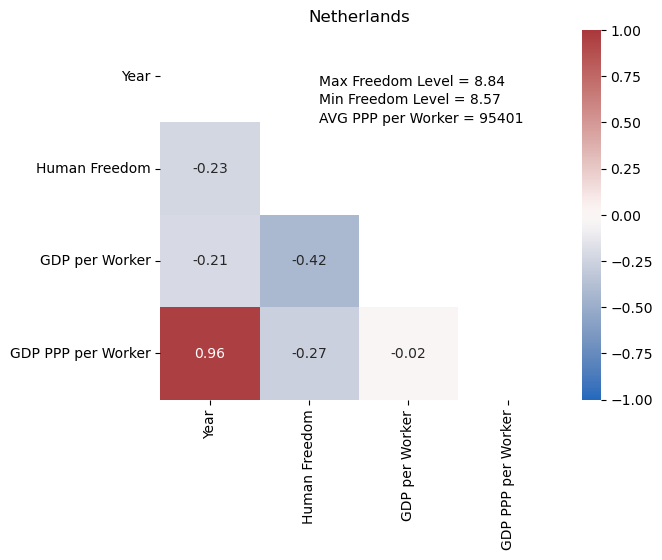

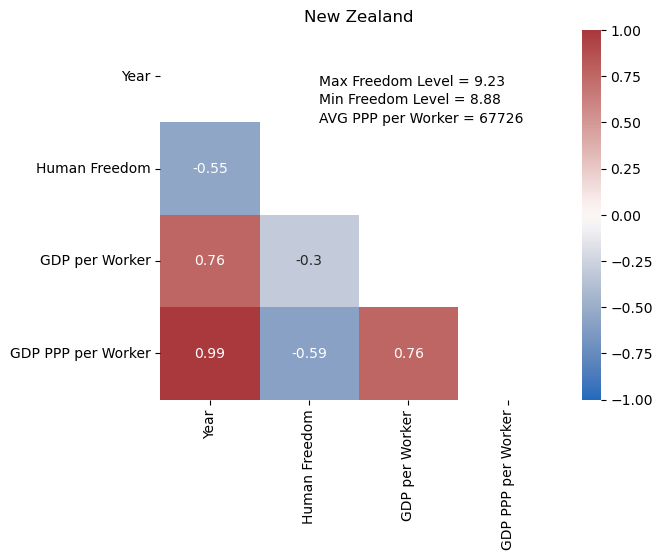

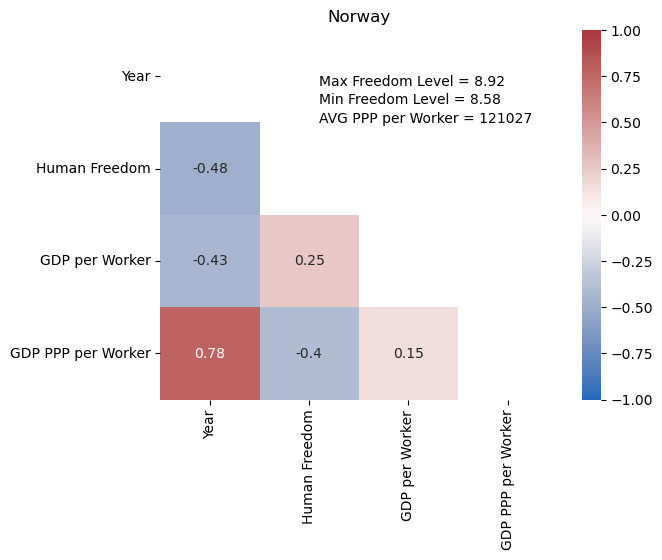

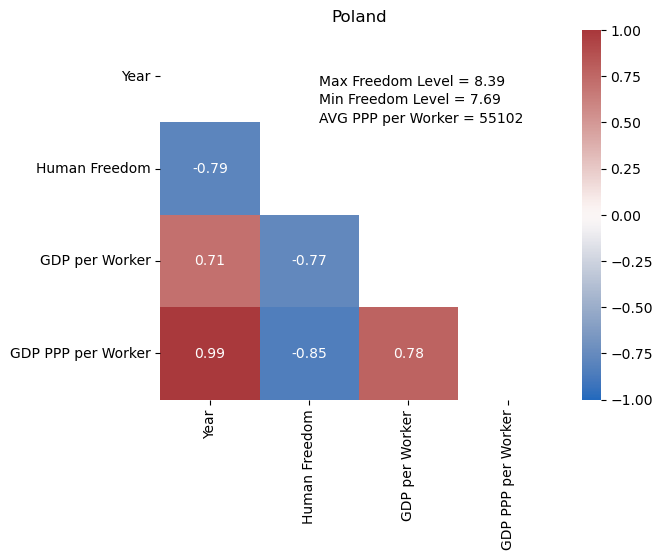

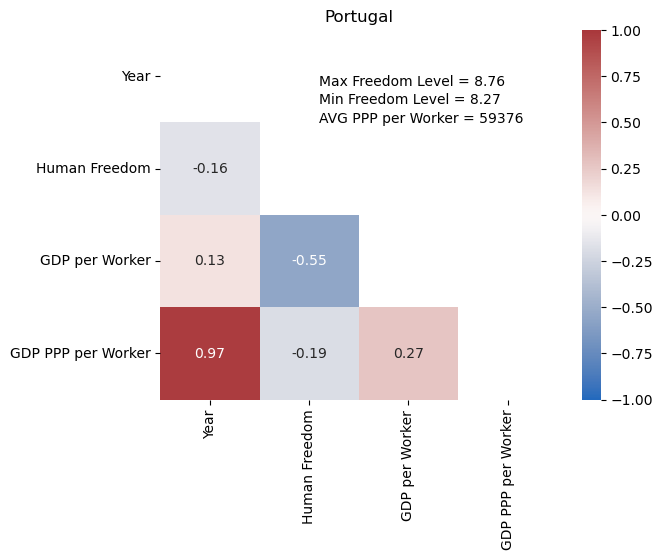

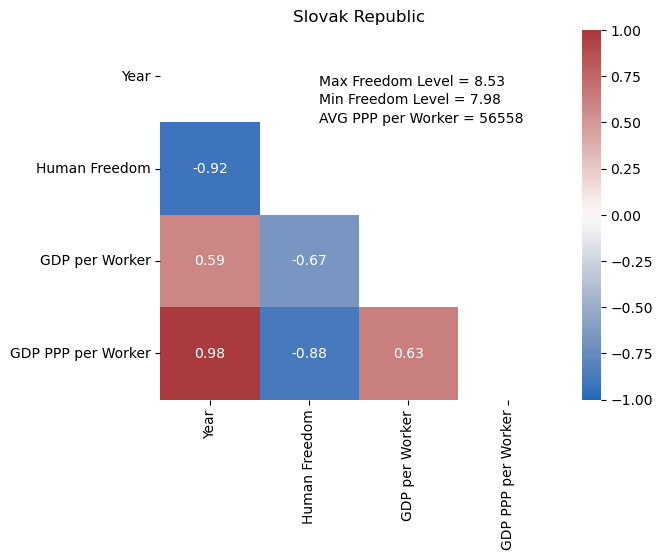

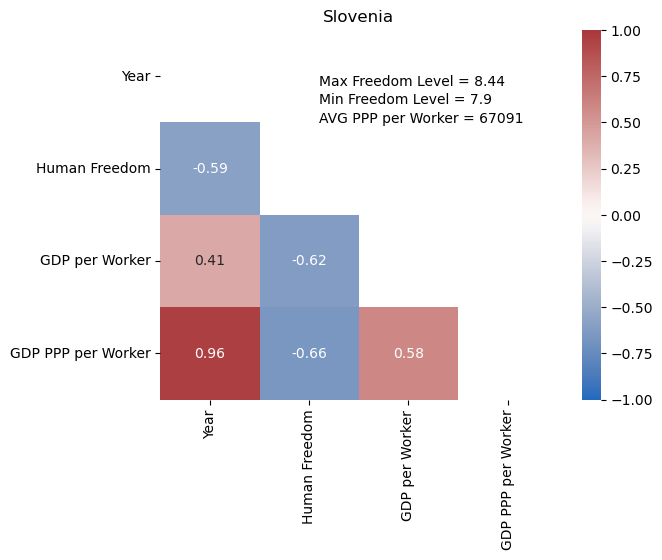

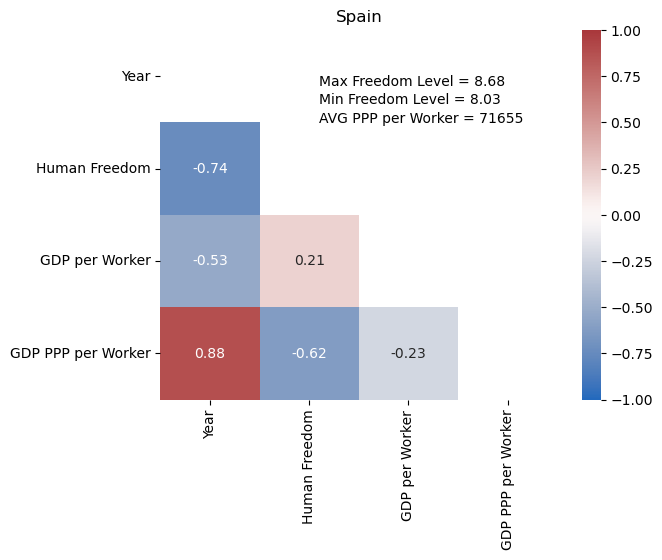

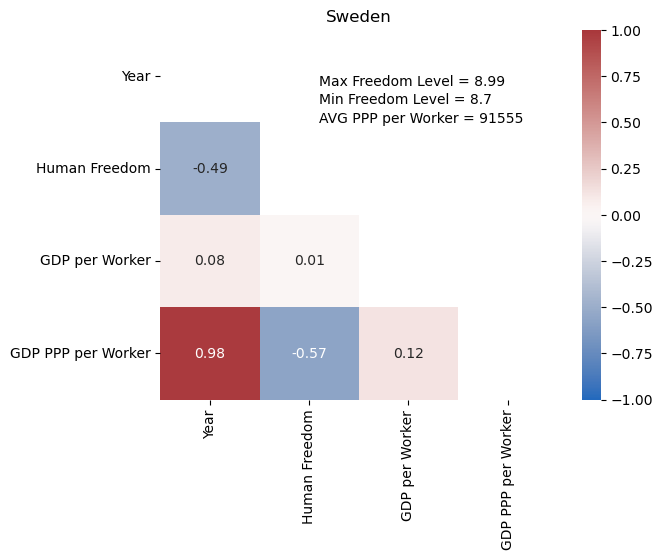

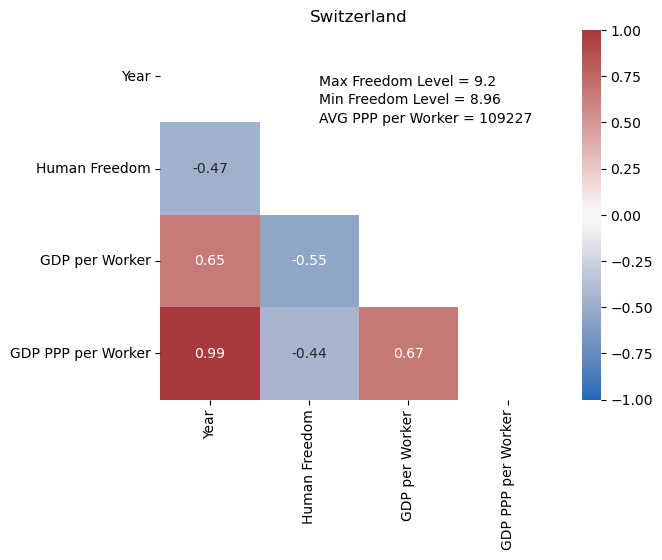

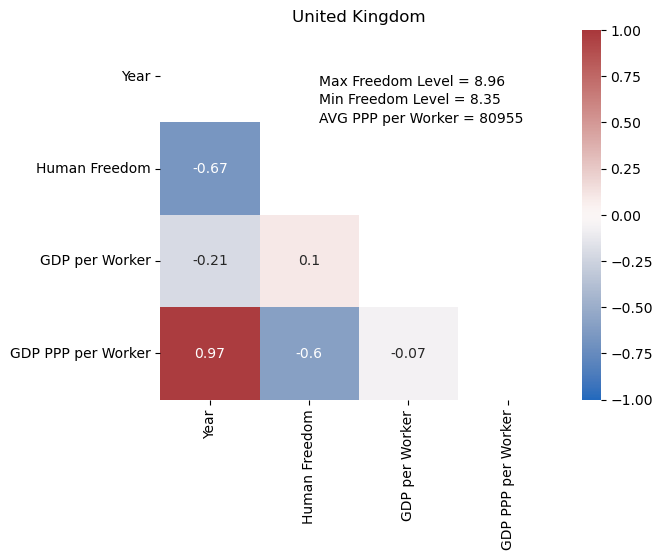

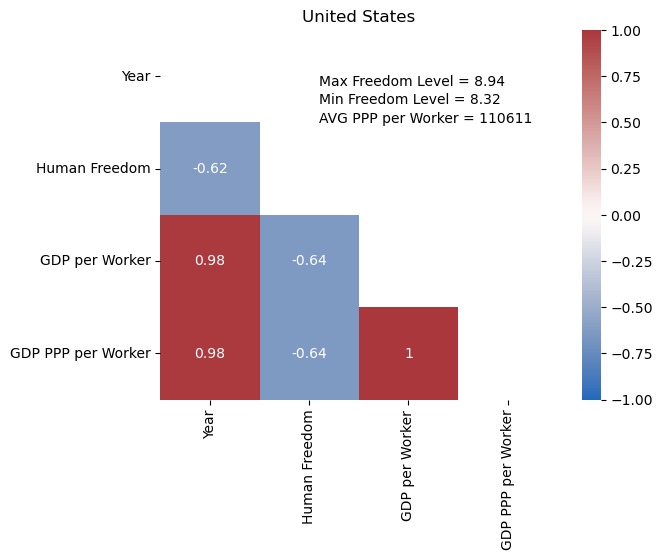

In [14]:
for idex, code in enumerate(countryCodes):
    matrix = FreedomAndGdp[FreedomAndGdp['iso3c'] == code][['Year', 'Human Freedom', 'GDP per Worker', 'GDP PPP per Worker']].corr().round(2)
    FreedomMax = FreedomAndGdp[FreedomAndGdp['iso3c'] == code]['Human Freedom'].max()
    FreedomMin = FreedomAndGdp[FreedomAndGdp['iso3c'] == code]['Human Freedom'].min()
    PPPperWorkerAvg = FreedomAndGdp[FreedomAndGdp['iso3c'] == code]['GDP PPP per Worker'].mean()

    mask = np.triu(np.ones_like(matrix, dtype=bool))
    heatMap = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
    ax = plt.gca()

    plt.text(.4, .85, "Max Freedom Level = {}".format(round(FreedomMax, 2)), transform=ax.transAxes)
    plt.text(.4, .8, "Min Freedom Level = {}".format(round(FreedomMin, 2)), transform=ax.transAxes)
    plt.text(.4, .75, "AVG PPP per Worker = {}".format(round(PPPperWorkerAvg)), transform=ax.transAxes)
    plt.title(FreedomAndGdp[(FreedomAndGdp['iso3c'] == code) & (FreedomAndGdp['Year'] == 2015)]['Country'].to_string(index=False))
    fig = heatMap.get_figure()
    fig.savefig('GdpAndFreedom_HeatMap_{}'.format(FreedomAndGdp[(FreedomAndGdp['iso3c'] == code) & (FreedomAndGdp['Year'] == 2015)]['Country'].to_string(index=False)), dpi=300, bbox_inches='tight')
    plt.show()

In [15]:
for index, code in enumerate(countryCodes):
    Co2Gdp = FreedomAndGdp[FreedomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Human Freedom', 'Year']].corr().iloc[0,2].round(2)
    Co2Ppp = FreedomAndGdp[FreedomAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Human Freedom', 'Year']].corr().iloc[1,2].round(2)
    if (Co2Gdp > .74 or Co2Ppp > .74):
        print(FreedomAndGdp[(FreedomAndGdp['iso3c'] == code) & (FreedomAndGdp['Year'] == 2021)]['Country'].to_string(index=False))

Greece
Iceland


/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


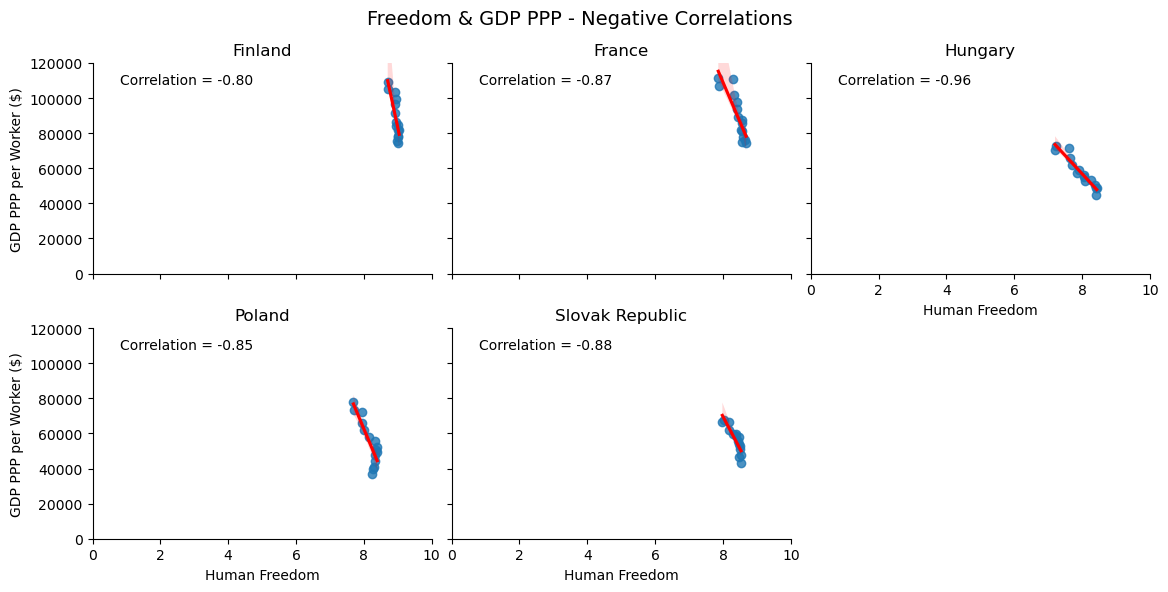

In [16]:
NegativeCountries = ['Finland', 'France', 'Hungary', 'Poland', 'Slovak Republic']
FreeAndGdpPosCountries = FreedomAndGdp[FreedomAndGdp['Country'].isin(NegativeCountries)]

def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Human Freedom']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=FreeAndGdpPosCountries, col='Country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Human Freedom', y='GDP PPP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotate)
plt.xlim([0, 10])
plt.xticks([0, 2, 4, 6, 8, 10])
plt.ylim([0, 120000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(NegativeCountries[i])
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.89)
g.figure.suptitle('Freedom & GDP PPP - Negative Correlations', fontsize=14)
g.savefig('FreeAndGdpPPP_NegCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure

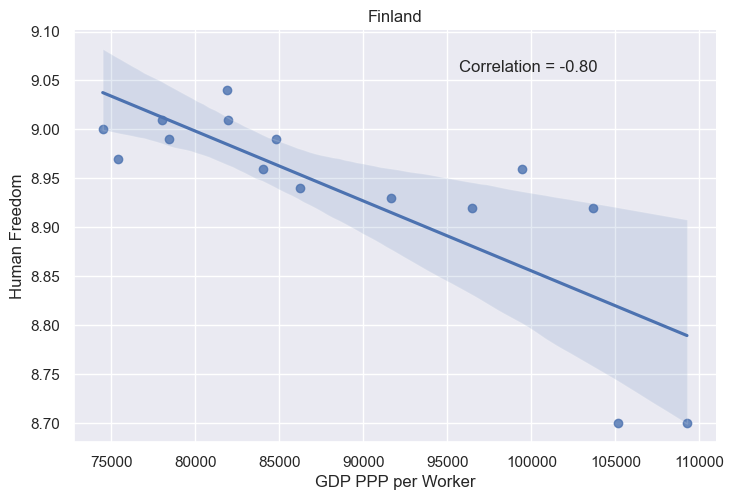

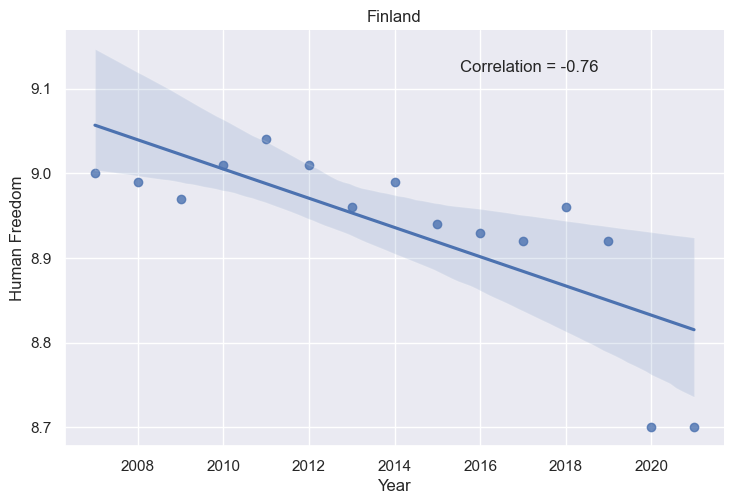

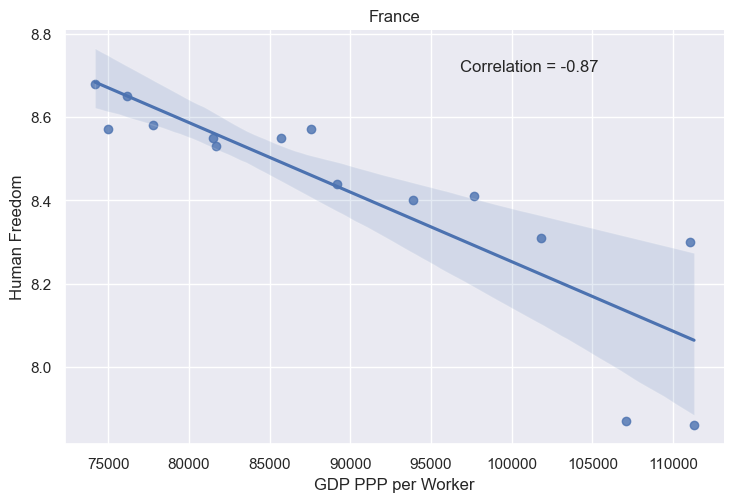

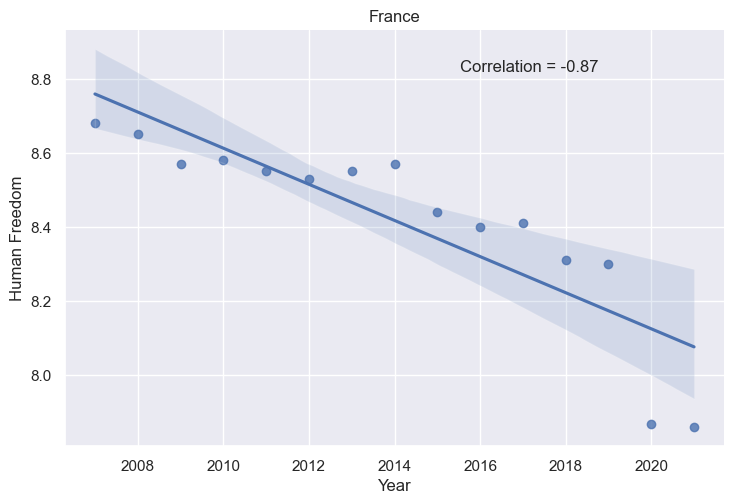

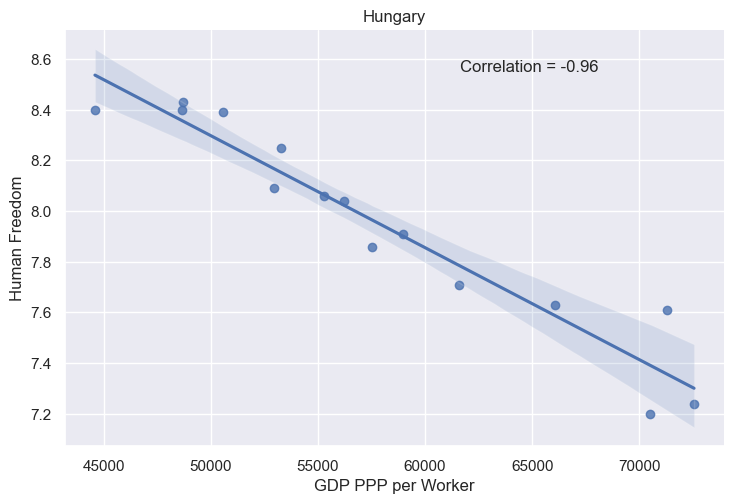

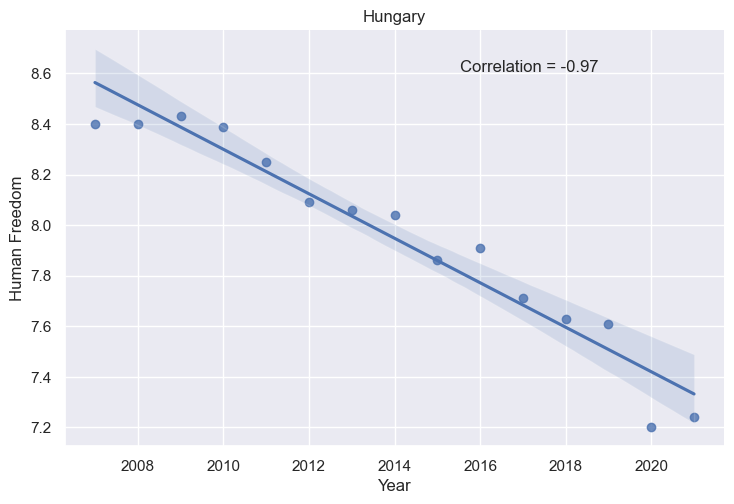

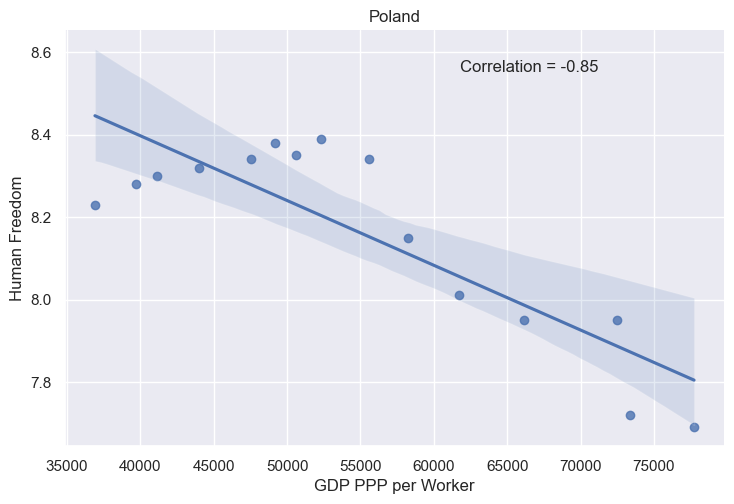

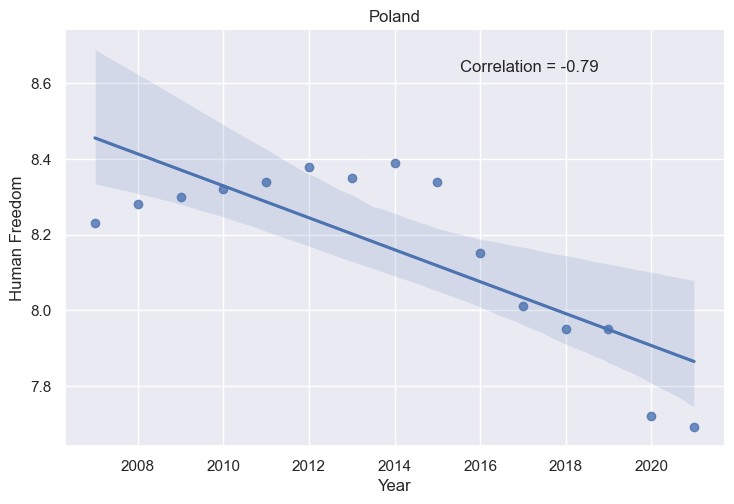

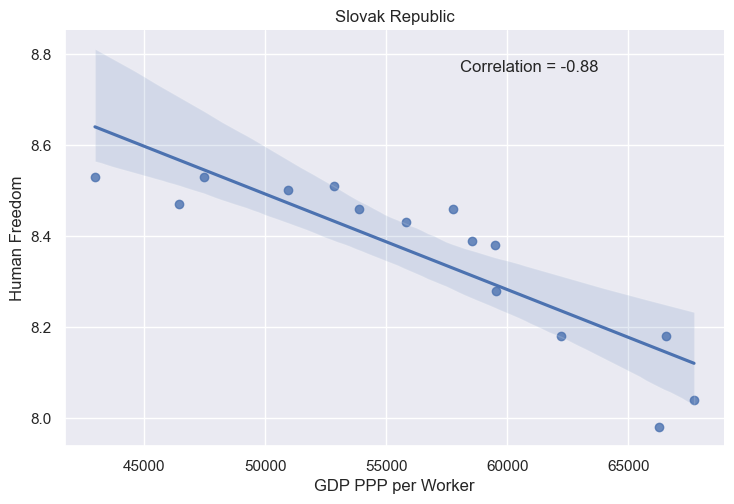

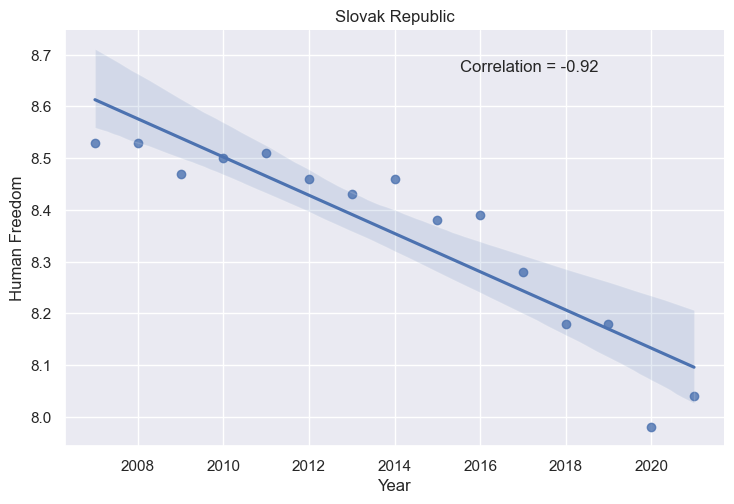

In [168]:
NegativeCountries = ['Finland', 'France', 'Hungary', 'Poland', 'Slovak Republic']

for index, countryName in enumerate(NegativeCountries):
    sns.lmplot(data=FreedomAndGdp[FreedomAndGdp['Country'] == countryName], x='GDP PPP per Worker', y='Human Freedom', height=5, aspect=1.5)
    ax = plt.gca()
    r = FreedomAndGdp[FreedomAndGdp['Country'] == countryName][['GDP per Worker', 'Human Freedom', 'Year', 'GDP PPP per Worker']].corr().iloc[1,3]
    plt.text(.6, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
    plt.title(countryName)

    sns.lmplot(data=FreedomAndGdp[FreedomAndGdp['Country'] == countryName], x='Year', y='Human Freedom', height=5, aspect=1.5)
    ax = plt.gca()
    r = FreedomAndGdp[FreedomAndGdp['Country'] == countryName][['GDP per Worker', 'Human Freedom', 'Year', 'GDP PPP per Worker']].corr().iloc[2,1]
    plt.text(.6, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
    plt.title(countryName)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


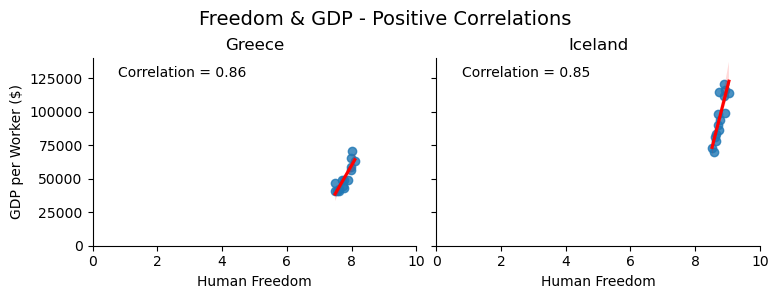

In [17]:
PositiveCountries = ['Greece', 'Iceland']
FreeAndGdpPosCountries = FreedomAndGdp[FreedomAndGdp['Country'].isin(PositiveCountries)]

def annotate(data, **kws):
    r = data[['GDP per Worker', 'Human Freedom']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=FreeAndGdpPosCountries,col='Country', col_wrap=2, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Human Freedom', y='GDP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotate)
plt.xlim([0, 10])
plt.xticks([0, 2, 4, 6, 8, 10])
plt.ylim([0, 140000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(PositiveCountries[i])
    ax.set_ylabel("GDP per Worker ($)")

g.figure.subplots_adjust(top=0.82)
g.figure.suptitle('Freedom & GDP - Positive Correlations', fontsize=14)
g.savefig('FreedomPlots/FreeAndGdp_PosCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Iceland')

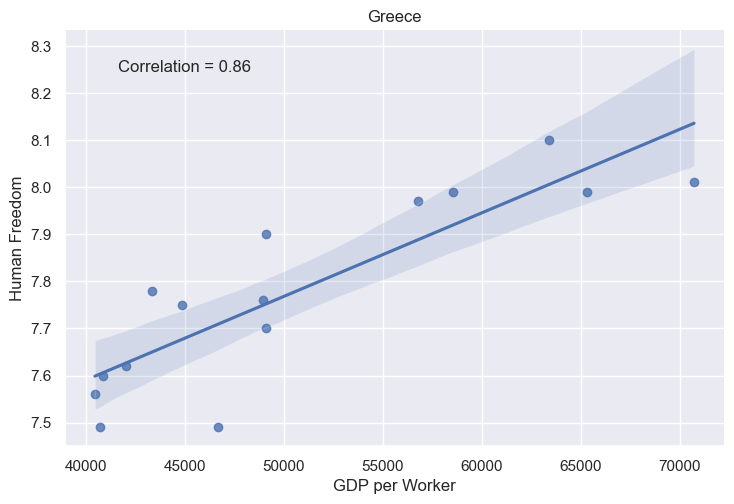

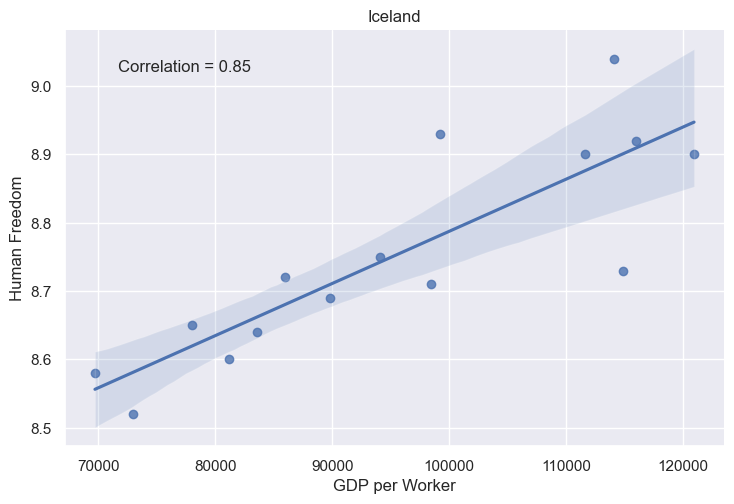

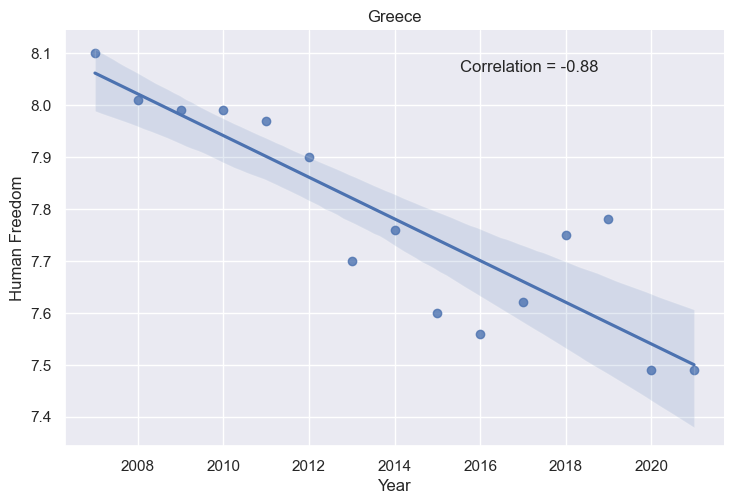

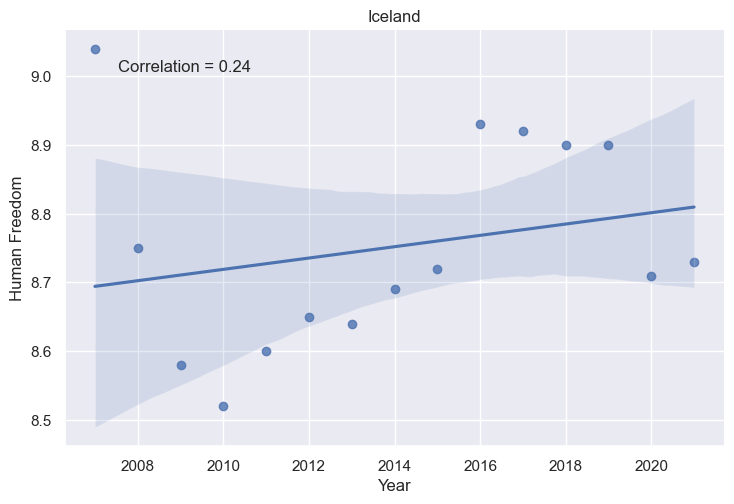

In [172]:
sns.lmplot(data=FreedomAndGdp[FreedomAndGdp['Country'] == 'Greece'], x='GDP per Worker', y='Human Freedom', height=5, aspect=1.5)
ax = plt.gca()
r = FreedomAndGdp[FreedomAndGdp['Country'] == 'Greece'][['GDP per Worker', 'Human Freedom', 'Year', 'GDP PPP per Worker']].corr().iloc[1,0]
plt.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.title('Greece')

sns.lmplot(data=FreedomAndGdp[FreedomAndGdp['Country'] == 'Iceland'], x='GDP per Worker', y='Human Freedom', height=5, aspect=1.5)
ax = plt.gca()
r = FreedomAndGdp[FreedomAndGdp['Country'] == 'Iceland'][['GDP per Worker', 'Human Freedom', 'Year', 'GDP PPP per Worker']].corr().iloc[1,0]
plt.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.title('Iceland')


sns.lmplot(data=FreedomAndGdp[FreedomAndGdp['Country'] == 'Greece'], x='Year', y='Human Freedom', height=5, aspect=1.5)
ax = plt.gca()
r = FreedomAndGdp[FreedomAndGdp['Country'] == 'Greece'][['GDP per Worker', 'Human Freedom', 'Year', 'GDP PPP per Worker']].corr().iloc[2,1]
plt.text(.6, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.title('Greece')

sns.lmplot(data=FreedomAndGdp[FreedomAndGdp['Country'] == 'Iceland'], x='Year', y='Human Freedom', height=5, aspect=1.5)
ax = plt.gca()
r = FreedomAndGdp[FreedomAndGdp['Country'] == 'Iceland'][['GDP per Worker', 'Human Freedom', 'Year', 'GDP PPP per Worker']].corr().iloc[2,1]
plt.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.title('Iceland')

In [18]:
AvgFreedom = pd.DataFrame(columns = ['Country', 'iso3c', 'Avg Human Freedom'])
for index, code in enumerate(countryCodes):
    freeMean = round(FreedomAndGdp[FreedomAndGdp['iso3c'] == code]['Human Freedom'].mean(), 2)
    newRow = pd.DataFrame([{'Country':FreedomAndGdp[FreedomAndGdp['iso3c'] == code]['Country'].unique()[0], 'iso3c':code, 'Avg Human Freedom':freeMean}])
    AvgFreedom = pd.concat([AvgFreedom, newRow], ignore_index=True)

In [31]:
AvgFreedomRanked = AvgFreedom.sort_values('Avg Human Freedom', ascending=False).reset_index(drop=True)
AvgFreedomRanked.index += 1

In [32]:
AvgFreedomRanked

,Country,iso3c,Avg Human Freedom
1,New Zealand,NZL,9.15
2,Switzerland,CHE,9.13
3,Denmark,DNK,9.00
4,Finland,FIN,8.94
5,Australia,AUS,8.91
6,Sweden,SWE,8.91
7,Luxembourg,LUX,8.88
8,Estonia,EST,8.86
9,Canada,CAN,8.84
10,United Kingdom,GBR,8.83


/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


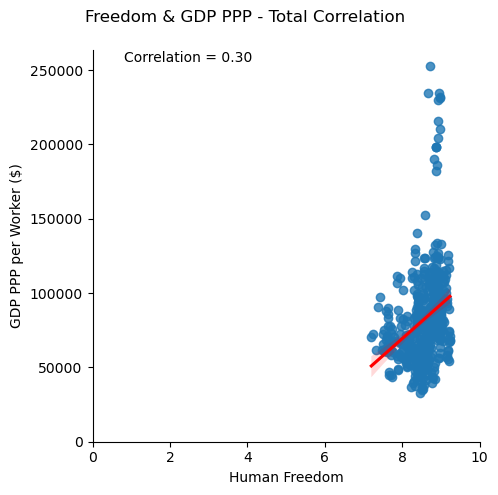

In [32]:
#Total Correlations - GDP PPP
g = sns.lmplot(data=FreedomAndGdp, x='Human Freedom', y='GDP PPP per Worker', line_kws={"color": "red"})
ax = plt.gca()
r = FreedomAndGdp[['GDP PPP per Worker', 'Human Freedom']].corr().iloc[1,0]
plt.text(.08, .97, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.xlim([0, 10])
plt.yticks([0, 50000, 100000, 150000, 200000, 250000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlabel("Human Freedom")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=.9)
g.figure.suptitle('Freedom & GDP PPP - Total Correlation', fontsize=12)
g.savefig('FreeAndGdpPPP_TotalCorrelationPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


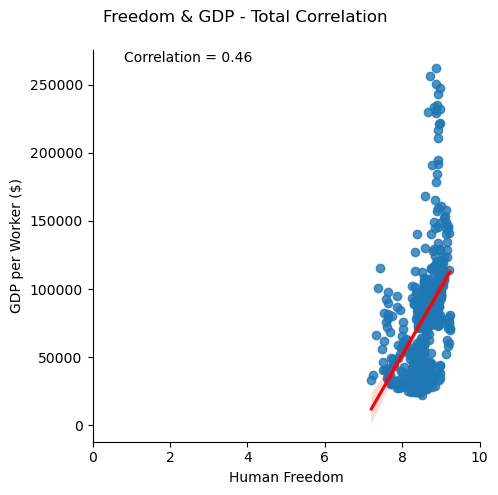

In [33]:
#Total Correlations - GDP 
g = sns.lmplot(data=FreedomAndGdp, x='Human Freedom', y='GDP per Worker', line_kws={"color": "red"})
ax = plt.gca()
r = FreedomAndGdp[['GDP per Worker', 'Human Freedom']].corr().iloc[1,0]
plt.text(.08, .97, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.xlim([0, 10])
plt.yticks([0, 50000, 100000, 150000, 200000, 250000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlabel("Human Freedom")
    ax.set_ylabel("GDP per Worker ($)")

g.figure.subplots_adjust(top=.9)
g.figure.suptitle('Freedom & GDP - Total Correlation', fontsize=12)
g.savefig('FreeAndGdp_TotalCorrelationPlot.png', dpi=300)